In [1]:
#RADIX-2 DIT_DFT ALGORITHM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fft import fft, fftfreq

In [3]:
def stage(x):
    k=math.log(len(x),2)
   
 
    return(k)

In [4]:
def reverse(n,size):
    bina=bin(n)
    rev=bina[-1:1:-1]
    l=int(len(rev))
    rev=rev+'0'*(int(size-l))
    
    
    return int(rev,2)

In [5]:
def dft(x):
    N=len(x)
    s=[0]*N
    for i in range(N):
        for j in range(N):
            s[i]+=x[j]*np.exp(-1j*2*np.pi*j*i/N)
    return(np.round(s))

In [6]:
x=[1,-1,0]

In [7]:
print(dft(x))

[0.+0.j 1.+1.j 2.-1.j]


In [8]:
def dit(x):
    l=int(stage(x))
    k=int(len(x))
    a=int(len(x)/2)
    aeven=[0]*a
    aodd=[0]*a
    xriv=[0]*k
    X=[0]*k
    for y in range(k):
            xriv[y]=x[reverse(y,l)]
    for i in range(l):
            sum=0
            for j in range(2**i):
                aeven[j]=sum
                sum=sum+1
            for j in range(2**i,a):
                aeven[j]=aeven[j-(2**i)]+2**(i+1)
            for j in range(a):
                aodd[j]=aeven[j]+2**i
                k=0
            w=np.exp(-1j*2*np.pi/2**(i+1))
            for n in range(a):
                if k<2**i:
                    X[aeven[n]]=xriv[aodd[n]]*(w**k)+xriv[aeven[n]]
                    k=k+1
                else:
                    k=0
                    X[aeven[n]]=xriv[aodd[n]]*(w**k)+xriv[aeven[n]]
                    k=k+1

            k=0
            for n in range(int(len(x)/2)):
                if k<2**i:
                    X[aodd[n]]=+xriv[aeven[n]]-xriv[aodd[n]]*(w**k)
                    k=k+1
                else:
                    k=0
                    X[aodd[n]]=+xriv[aeven[n]]-xriv[aodd[n]]*(w**k)
                    k=k+1
            for n in range(len(x)):
                xriv[n]=X[n]
    return np.round(X)
print(dit(x))
print(dft(x))
print(np.round(fft(x)))

[0.+0.j 2.+0.j 0.+0.j]
[0.+0.j 1.+1.j 2.-1.j]
[0.-0.j 2.+1.j 2.-1.j]


In [9]:
fs=1000
t=np.arange(0, 10, 1/fs);
y1=10*(np.sin(2*np.pi*4*t))
y2=30*(np.sin(2*np.pi*10*t))
y3=40*(np.sin(2*np.pi*24*t))

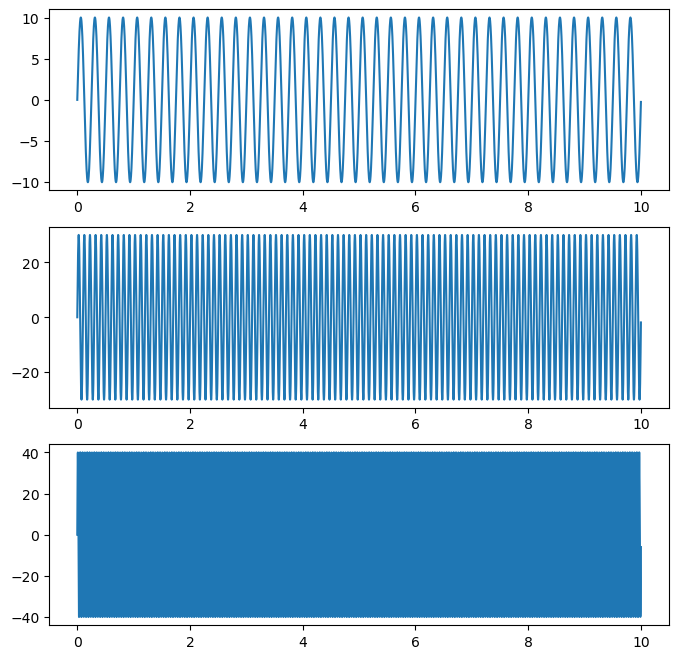

In [10]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(8,8))
ax1.plot(t,y1)
ax2.plot(t,y2)
ax3.plot(t,y3)

<StemContainer object of 3 artists>

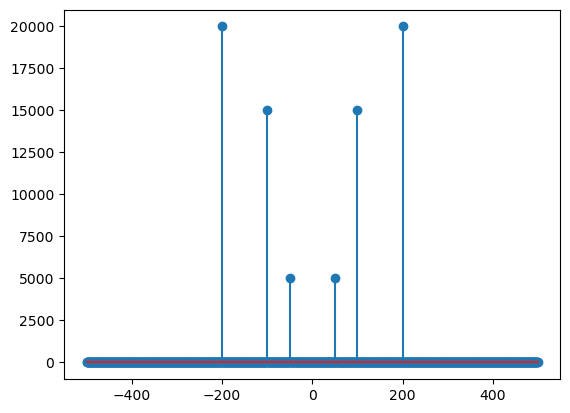

In [11]:
y=[0]*fs
for i in np.arange(fs):
    y[i]=(10*(np.sin(2*np.pi*50*i/fs))+30*(np.sin(2*np.pi*100*i/fs))+40*(np.sin(2*np.pi*200*i/fs)))
Y=fft(y)
f=fftfreq(len(y))*fs
plt.stem(f, np.abs(Y))

In [ ]:
#RADIX-2 DIT_DFT ALGORITHM

In [12]:
def stage(x):
    k=math.log(len(x),2)
    return(k)

In [13]:
def reverse(n,size):
    bina=bin(n)
    rev=bina[-1:1:-1]
    l=int(len(rev))
    rev=rev+'0'*(int(size-l))
    
    
    return int(rev,2)

In [14]:
def dft(x):
    N=len(x)
    s=[0]*N
    for i in range(N):
        for j in range(N):
            s[i]+=x[j]*np.exp(-1j*2*np.pi*j*i/N)
    return(np.round(s))

In [15]:
x=[1,2,4,8,16,32,64,128]

In [16]:
def dif(x):
    l=int(stage(x))
    k=int(len(x))
    a=int(len(x)/2)
    aeven=[0]*a
    aodd=[0]*a
    xriv=[0]*k
    X=[0]*k
    for y in range(k):
            xriv[y]=x[reverse(y,l)]
    for i in range(l):
            sum=0
            for j in range(2**(l-i-1)):
                aeven[j]=sum
                sum=sum+1
            for j in range(2**(l-i-1),a):
                aeven[j]=aeven[j-(2**(l-i-1))]+2**(l-i)
            for j in range(a):
                aodd[j]=aeven[j]+2**(l-i-1)
                k=0
            w=np.exp(-1j*2*np.pi/2**(l-i))
            for n in range(int(len(x)/2)):
                X[aeven[n]]=xriv[aodd[n]]+xriv[aeven[n]]

            k=0
            for n in range(int(len(x)/2)):
                if k<2**(l-i-1):
                    X[aodd[n]]=+xriv[aeven[n]]-xriv[aodd[n]]*(w**k)
                    k=k+1
                else:
                    k=0
                    X[aodd[n]]=+xriv[aeven[n]]-xriv[aodd[n]]*(w**k)
                    k=k+1
            for n in range(len(x)):
                xriv[n]=X[n]
    return np.round(X)
print(dif(x))
print(dft(x))
print(np.round(fft(x)))

[ 255.  +0.j -225.  +0.j   39.+192.j  -57.-192.j  151.+121.j -145.-105.j
 -102.+169.j   92.-185.j]
[255.  +0.j  49.+166.j -51.+102.j -79. +46.j -85.  -0.j -79. -46.j
 -51.-102.j  49.-166.j]
[255.  -0.j  49.+166.j -51.+102.j -79. +46.j -85.  -0.j -79. -46.j
 -51.-102.j  49.-166.j]
